In [1]:
#Importing the Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error as MSE

In [2]:
# Creating the DataFrame
df = pd.DataFrame({'X1': [1,3,5], 'Y': [4.8, 12.4, 15.5]})
df

,X1,Y
0,1,4.8
1,3,12.4
2,5,15.5


In [3]:
# Learning Rate
alpha = 0.01
# initialize the weights w0 and w1 as 0.
w0 = 0
w1 = 0

#Equation Of Predicted Line
df['Y1'] = w1*(df['X1']) + w0
df



,X1,Y,Y1
0,1,4.8,0
1,3,12.4,0
2,5,15.5,0


In [4]:
# Error during the intial phases
Cost = MSE(df['Y'],df['Y1'] )
Cost

139.01666666666668

In [5]:
# Creating empty list 
Cost_new = [] 
w0_new = []
w1_new = []

Cost_new.append(Cost)
w0_new.append(w0)
w1_new.append(w1)
# To find the exact number of iterations by doing float level comparision
precision = 0.00001  
i = 0

# Initializing the loop for cost minimization
for i in range(1,1000) :
    w1_d = 2*np.mean((df['Y1'] -df['Y'])*df['X1'])       # partial differential of 'w1' and 'w0' weight
    w0_d = 2*np.mean(df['Y1'] -df['Y'])
    w1 = w1 - alpha*(w1_d)                     # updating values of w1 and w0 respectively 
    w0 = w0 - alpha*(w0_d)
    df['Y1'] = w1*(df['X1']) + w0       # Updating the best fit line equations
    Cost = MSE(df['Y'],df['Y1'])       # Updating new Root mean square error
    Cost_new.append(Cost)      #Appending all the values to the empty lists
    w0_new.append(w0)
    w1_new.append(w1)
    print("w1 {}, w0 {}, mse {}, iterations {}".format(w1,w0,Cost,i))
    if (Cost_new[i-1] - Cost_new[i]) < precision: #Looping on the basis of float level comparision
        break
    else:
        continue
print('No. Of iterations:' ,i)   


w1 0.7966666666666667, w0 0.218, mse 79.29062696296296, iterations 1
w1 1.3943644444444443, w0 0.38383999999999996, mse 45.60613987418602, iterations 2
w1 1.8426490074074073, w0 0.5105013333333333, mse 26.607172857920148, iterations 3
w1 2.1787341590123455, w0 0.6077323662222222, mse 15.889771554831675, iterations 4
w1 2.4305655799361316, w0 0.682853669357037, mse 9.842583803746033, iterations 5
w1 2.6191290577896122, w0 0.7413626611737283, mse 6.429076489840479, iterations 6
w1 2.7601838513016124, w0 0.787387664482877, mse 4.500796810248688, iterations 7
w1 2.8655643594622635, w0 0.8240288801151228, mse 3.410102924317784, iterations 8
w1 2.944157609447495, w0 0.8536144409450845, mse 2.791772967715016, iterations 9
w1 3.0026373007863745, w0 0.8778926955593331, mse 2.4398488492475616, iterations 10
w1 3.046015035535994, w0 0.898176603600964, mse 2.23818535149776, iterations 11
w1 3.0780542643615374, w0 0.9154521693967851, mse 2.121285011251848, iterations 12
w1 3.101581139180038, w0 0.9

In [6]:
#Dataframe with the updated target prediction
df

,X1,Y,Y1
0,1,4.8,5.497653
1,3,12.4,10.884811
2,5,15.5,16.271970


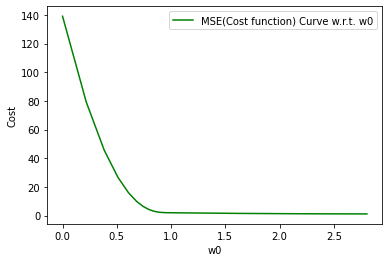

In [7]:
#Plotting Loss function (y-axis) vs w0 (x-axis) 
plt.plot(w0_new, Cost_new, color = 'green' ,label = 'MSE(Cost function) Curve w.r.t. w0')
plt.xlabel('w0')
plt.ylabel('Cost')
plt.legend()

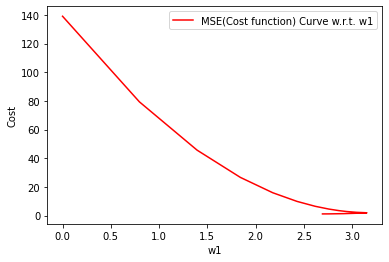

In [8]:
#Plotting Loss function (y-axis) vs w1 (x-axis)
plt.plot(w1_new, Cost_new, color = 'red' ,label = 'MSE(Cost function) Curve w.r.t. w1')
plt.xlabel('w1')
plt.ylabel('Cost')
plt.legend()

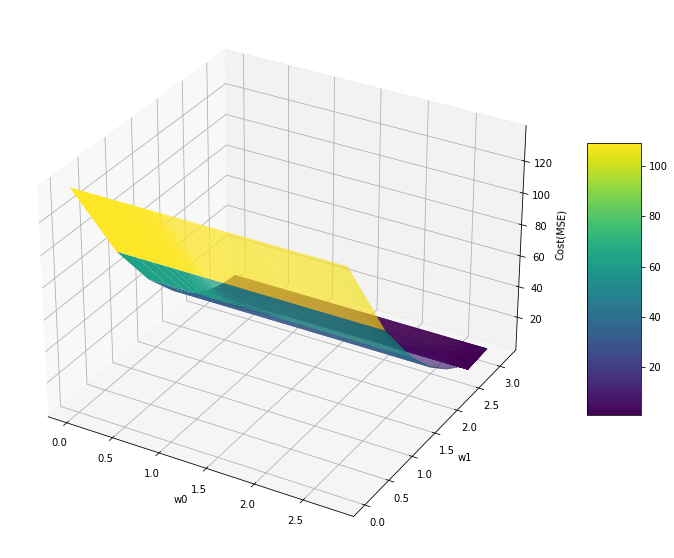

In [12]:
# Plotting 3D-plot of Loss function(MSE) w.r.t. w0 & w1
fig = plt.figure(figsize = (13,10))

#Definding projection type 3D
ax = plt.axes(projection='3d')

#updating values of X,Y and Z
X , Y = np.meshgrid(w0_new, w1_new)
Z = pd.DataFrame(Cost_new)

#Plotting the surface plot in 3D Projections

surf=ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='viridis', edgecolor='none')

#Naming the axis title

ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Cost(MSE)')
fig.colorbar(surf,ax=ax, shrink=0.5, aspect=5)
plt.show()
